### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 6


### Дисциплина: Методы машинного обучения

## Студент:  Фаик Карим
## Группа:   НФИбд-02-21

Вариант 11

1. Набор данных oxford_iiit_pet с изменением разрешения до 64x96

2. Классы с метками 21,22,23,30

3. Требования к архитектуре сети MLP:

Функциональный API при создании

Функция потерь: категориальная кросс-энтропия

Кол-во скрытых слоев 5

Кол-во нейронов 50 в первом скрытом слое, увеличивающееся на 10 с каждым последующим скрытым слоем

Использование слоев с регуляризацией L2

4. Требования к архитектуре сети CNN:

Последовательный API со списком слоев при создании

Функция потерь: разреженная категориальная кросс-энтропия

Кол-во сверточных слоев 5

Количество фильтров в сверточных слоях 16

Размеры фильтра 2х2

Использование слоев пакетной нормализации

5. Требования к архитектуре сети RNN:

Последовательный API с методом add() при создании

Функция потерь: категориальная кросс-энтропия

Слой LSTM с 64 нейронами

Использование слоев dropout

6. Показатель качества многоклассовой классификации:

максимальная полнота классов, где полнота (recall) класса равна доле правильных предсказаний для всех точек, принадлежащих этому классу.

# 1.Загрузите заданный в индивидуальном задании набор данных с изображениями из Tensorflow Datasets с разбиением на обучающую, и валидационную и тестовую выборки. Если при дальнейшей работе с данными возникнет нехватка вычислительных ресурсов, то разрешение изображений можно уменьшить.

In [1]:
!pip install -q tfds-nightly
import numpy as np
import os
import PIL
import PIL.Image
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
ds = tfds.load("stanford_dogs", split=['train[:40%]','test[:40%]'])

In [3]:
df_train = tfds.as_dataframe(ds[0])
df_test  = tfds.as_dataframe(ds[1])
df_train.shape, df_test.shape

((4800, 4), (3432, 4))

In [4]:
df_train['label'].unique(), df_test['label'].unique()

(array([ 36, 118,  46, 103, 113, 116,  70,   9,  13,  95, 115,  89,  82,
        106,  44, 101,  99,  83,  79,  12,  21,  91,  29,  32,  75,  93,
         25,  63,   8,  94,  19,  31,  72,  68,  61,  76,  30,  81,  50,
         43,  78,  27,  60,  74, 107,  49, 111,  16,  80,  96,  55,  57,
         37, 105, 108,  90,  34,  66,  38,   1,  64,  69,  42, 110,  33,
          6,  52,  73,  41,  62,  58,   2,  15,  18,  35,  86,  40,  53,
         54, 112,  85,  67,  65,  97,  98,  11,  48,  39, 109,  88,  47,
          7,  26,  17,   3,  45,  59,  24, 119,  77,  51, 104,  14, 117,
         10,  56,  92,  28,   4,   0,  23, 114, 100,  71, 102,  84,  87,
          5,  20,  22]),
 array([ 67,  84,  57,  12,  88,  32,  55,   9,  68,  99,  10,   1,  60,
         52,  96,  33, 108,  71,  11,  75,  77,  50,  19,  41, 118,  30,
         40,  17,  87,  51,   4,   2,  16,  69, 104, 105,  95,  13,  85,
         58,  26,  80,  14,  53,  37,  94,  31, 111,  73, 106, 109, 107,
         44,  54,  42,  23

In [5]:
df_train.head()

,image,image/filename,label,objects/bbox
0,"[[[14, 14, 14], [14, 14, 14], [14, 14, 14], [1...",b'Images/n02094433-Yorkshire_terrier/n02094433...,36,"[[0.044, 0.2102102, 0.972, 0.960961]]"
1,"[[[26, 25, 30], [25, 24, 29], [24, 23, 28], [2...",b'Images/n02115913-dhole/n02115913_3998.jpg',118,"[[0.07084469, 0.28, 0.98092645, 0.6975]]"
2,"[[[110, 131, 114], [107, 128, 109], [113, 130,...",b'Images/n02097130-giant_schnauzer/n02097130_2...,46,"[[0.062, 0.0, 0.996, 0.96533334]]"
3,"[[[129, 139, 140], [129, 139, 140], [130, 140,...",b'Images/n02111129-Leonberg/n02111129_2072.jpg',103,"[[0.18068536, 0.0044444446, 0.99688476, 0.9488..."
4,"[[[252, 252, 252], [253, 253, 253], [253, 253,...",b'Images/n02113624-toy_poodle/n02113624_4349.jpg',113,"[[0.003003003, 0.206, 0.9069069, 0.566], [0.14..."


In [6]:
train_labels = df_train['label'].to_numpy(dtype=np.float32)
test_labels = df_test['label'].to_numpy(dtype=np.float32)
train_labels.shape, test_labels.shape

((4800,), (3432,))

In [7]:
train_images = np.zeros(shape=(df_train.shape[0],64,96,3), dtype=np.float32)
test_images  = np.zeros(shape=(df_test.shape[0],64,96,3), dtype=np.float32)
train_images.shape, test_images.shape

((4800, 64, 96, 3), (3432, 64, 96, 3))

In [8]:
from PIL import Image, ImageOps

In [9]:
for idx in range(train_labels.shape[0]):

    train_images[idx,:,:,:] = \
        np.array(tf.image.resize(Image.fromarray(df_train.iloc[idx]['image']), [64, 96]))


for idx in range(test_labels.shape[0]):
    test_images[idx,:,:,:] = \
        np.array(tf.image.resize(Image.fromarray(df_test.iloc[idx]['image']), [64, 96]))

train_images.shape, test_images.shape

((4800, 64, 96, 3), (3432, 64, 96, 3))

In [10]:
train_images /= 255
test_images  /= 255

train_images.shape, test_images.shape

((4800, 64, 96, 3), (3432, 64, 96, 3))

# 2.Оставьте в наборе изображения, указанных в индивидуальном задании, и визуализируйте несколько изображений.

In [11]:
import random

def plot_random_sample(images):
    n = 20
    imgs = random.sample(list(images), n)

    num_row = 4
    num_col = 5

    fig, axes = plt.subplots(num_row, num_col, figsize=(3.5 * num_col, 3 * num_row))
    # For every image
    for i in range(num_row * num_col):
        # Read the image
        img = imgs[i]
        # Display the image
        ax = axes[i // num_col, i % num_col]
        ax.imshow(img)

    plt.tight_layout()
    plt.show()

In [12]:
trimages = []
trlabels = []

for i in range(train_labels.shape[0]):
  if(df_train.iloc[i]['label'] in (21,22,23,30)):
    trimages.append(train_images[i])
    trlabels.append(train_labels[i])

trimages = np.asarray(trimages)
trlabels = np.asarray(trlabels)

trimages.shape, trlabels.shape

((145, 64, 96, 3), (145,))

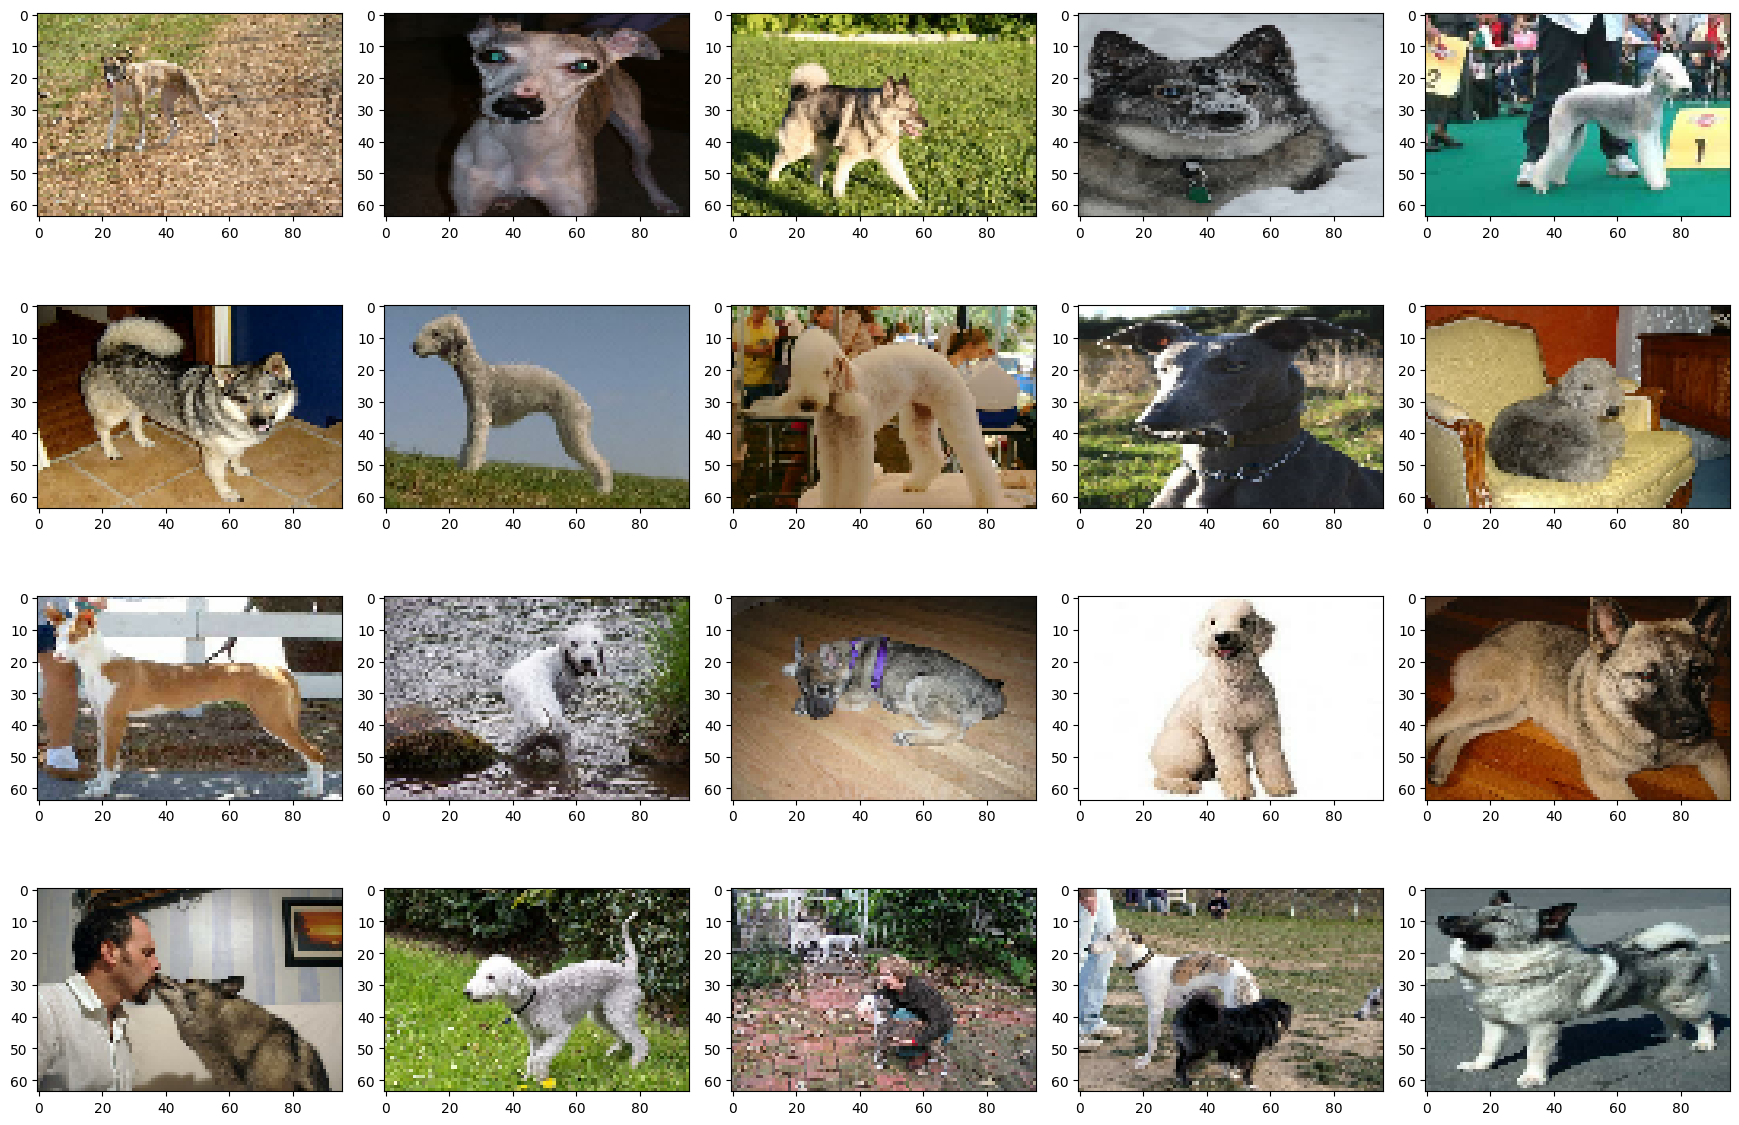

In [13]:
plot_random_sample(trimages)

In [14]:
tstimages = []
tstlabels = []

for i in range(test_labels.shape[0]):
  if(df_test.iloc[i]['label'] in (21,22,23,30)):
    tstimages.append(test_images[i])
    tstlabels.append(test_labels[i])

tstimages = np.asarray(tstimages)
tstlabels = np.asarray(tstlabels)

tstimages.shape, tstlabels.shape

((125, 64, 96, 3), (125,))

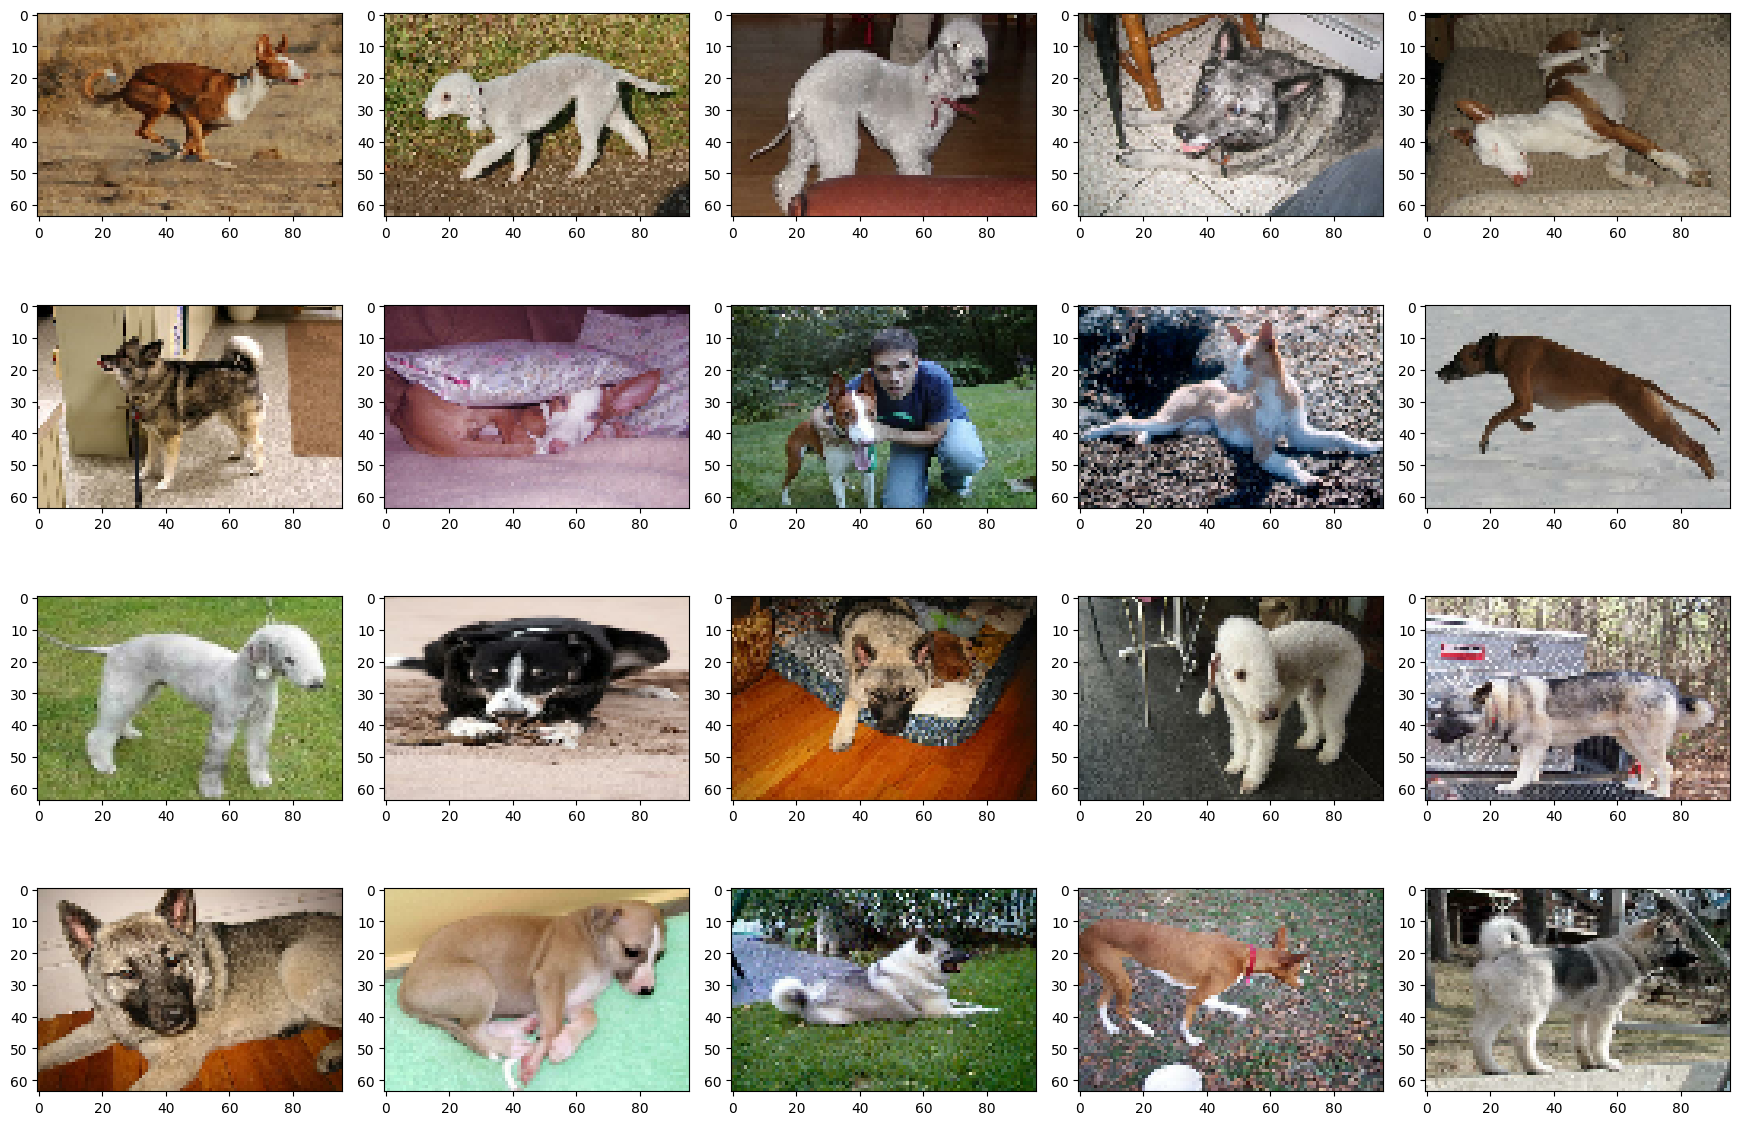

In [15]:
plot_random_sample(tstimages)

In [16]:
trlabels.shape

(145,)

In [17]:
tstlabels

array([30., 30., 23., 22., 21., 22., 23., 23., 22., 22., 23., 30., 21.,
       23., 23., 30., 22., 30., 22., 30., 23., 22., 30., 23., 22., 21.,
       22., 23., 22., 30., 22., 30., 22., 21., 21., 23., 21., 22., 30.,
       21., 30., 22., 30., 23., 23., 22., 21., 23., 21., 21., 30., 21.,
       22., 21., 23., 23., 22., 23., 21., 21., 22., 30., 21., 21., 23.,
       21., 22., 22., 23., 22., 23., 22., 21., 23., 23., 23., 21., 21.,
       30., 30., 23., 30., 23., 21., 22., 21., 30., 21., 21., 23., 21.,
       30., 30., 21., 22., 30., 22., 21., 30., 23., 23., 22., 22., 22.,
       21., 21., 30., 22., 22., 21., 23., 23., 23., 30., 30., 21., 23.,
       22., 23., 30., 22., 23., 21., 22., 23.], dtype=float32)

In [18]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
trlabels = encoder.fit_transform(trlabels.reshape(-1, 1))
tstlabels = encoder.fit_transform(tstlabels.reshape(-1, 1))
trlabels.shape, tstlabels.shape

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


((145, 4), (125, 4))

# 3.Постройте нейронные сети MLP, CNN и RNN для задачи многоклассовой классификации изображений (требования к архитектуре сетей указаны в индивидуальном задании), используя функцию потерь, указанную в индивидуальном задании. Подберите такие параметры обучения, как оптимизатор, начальная скорость обучения самостоятельно, обеспечивая обучение нейронных сетей. Останавливайте обучение нейронных сетей в случае роста потерь на валидационной выборке на нескольких эпохах обучения подряд. Для каждой нейронной сети выведите количество потребовавшихся эпох обучения.

In [19]:
tstlabels

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],


# MLP

In [20]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Recall


In [21]:
# Определение входного слоя
inputs = Input(shape=(64, 96, 3))
# Преобразование изображений в одномерный массив
x = Flatten()(inputs)
# Скрытые слои
for i in range(5):
    x = tf.keras.layers.Dense(50 + i * 10, activation='relu',kernel_initializer='lecun_normal', kernel_regularizer=l2(0.01))(x)
# Выходной слой
outputs = tf.keras.layers.Dense(4,activation='softmax')(x)  # 4 класса
# Создание модели
model_1 = tf.keras.Model(inputs,outputs)
# Компиляция модели
model_1.compile(optimizer=Adam(learning_rate=0.001),
                  loss=CategoricalCrossentropy(),
                  metrics=['accuracy'])

history_1 = model_1.fit(trimages,
                            trlabels,
                            epochs=50,
                            batch_size=128,
                            validation_data=(tstimages, tstlabels))


Epoch 1/50
2/2 [==============================] - 2s 339ms/step - loss: 4.8834 - accuracy: 0.2000 - val_loss: 4.8935 - val_accuracy: 0.2800
Epoch 2/50
2/2 [==============================] - 0s 71ms/step - loss: 4.8749 - accuracy: 0.2621 - val_loss: 4.9279 - val_accuracy: 0.2160
Epoch 3/50
2/2 [==============================] - 0s 77ms/step - loss: 4.7875 - accuracy: 0.3034 - val_loss: 5.1096 - val_accuracy: 0.2720
Epoch 4/50
2/2 [==============================] - 0s 66ms/step - loss: 5.0363 - accuracy: 0.2552 - val_loss: 4.6394 - val_accuracy: 0.2640
Epoch 5/50
2/2 [==============================] - 0s 64ms/step - loss: 4.5726 - accuracy: 0.2414 - val_loss: 4.5644 - val_accuracy: 0.3120
Epoch 6/50
2/2 [==============================] - 0s 62ms/step - loss: 4.4957 - accuracy: 0.3172 - val_loss: 4.4558 - val_accuracy: 0.2080
Epoch 7/50
2/2 [==============================] - 0s 84ms/step - loss: 4.3162 - accuracy: 0.3655 - val_loss: 4.4154 - val_accuracy: 0.3440
Epoch 8/50
2/2 [==========

In [22]:
trlabels.shape

(145, 4)

In [23]:
trimages.shape

(145, 64, 96, 3)

In [24]:

trlabels2 = []

for i in range(train_labels.shape[0]):
  if(df_train.iloc[i]['label'] in (21,22,23,30)):
    trlabels2.append(train_labels[i])
trlabels2 = np.asarray(trlabels2)
trlabels2.shape

(145,)

In [25]:
tstlabels2 = []

for i in range(test_labels.shape[0]):
  if(df_test.iloc[i]['label'] in (21,22,23,30)):
    tstlabels2.append(test_labels[i])


tstlabels2 = np.asarray(tstlabels2)
tstlabels2.shape

(125,)

In [26]:
tstlabels2 = tstlabels2.astype(dtype=int)
trlabels2 = trlabels2.astype(dtype=int)

In [27]:
for i in range(trlabels2.shape[0]):
  if trlabels2[i] == 21:
    trlabels2[i] = 0
  if trlabels2[i] == 22:
    trlabels2[i] = 1
  if trlabels2[i] == 23:
    trlabels2[i] = 2
  if trlabels2[i] == 30:
    trlabels2[i] = 3

In [28]:
for i in range(tstlabels2.shape[0]):
  if tstlabels2[i] == 21:
    tstlabels2[i] = 0
  if tstlabels2[i] == 22:
    tstlabels2[i] = 1
  if tstlabels2[i] == 23:
    tstlabels2[i] = 2
  if tstlabels2[i] == 30:
    tstlabels2[i] = 3

In [29]:
tstlabels2

array([3, 3, 2, 1, 0, 1, 2, 2, 1, 1, 2, 3, 0, 2, 2, 3, 1, 3, 1, 3, 2, 1,
       3, 2, 1, 0, 1, 2, 1, 3, 1, 3, 1, 0, 0, 2, 0, 1, 3, 0, 3, 1, 3, 2,
       2, 1, 0, 2, 0, 0, 3, 0, 1, 0, 2, 2, 1, 2, 0, 0, 1, 3, 0, 0, 2, 0,
       1, 1, 2, 1, 2, 1, 0, 2, 2, 2, 0, 0, 3, 3, 2, 3, 2, 0, 1, 0, 3, 0,
       0, 2, 0, 3, 3, 0, 1, 3, 1, 0, 3, 2, 2, 1, 1, 1, 0, 0, 3, 1, 1, 0,
       2, 2, 2, 3, 3, 0, 2, 1, 2, 3, 1, 2, 0, 1, 2])

# CNN

In [30]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(2, 2),input_shape=(64, 96, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(2, 2),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(2, 2),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(2, 2),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(2, 2),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(4, activation='softmax')

])

model_2.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

history_2 = model_2.fit(
    trimages,
    trlabels2,
    epochs=50,
    batch_size=128,
    validation_data=(tstimages, tstlabels2)
)

Epoch 1/50
2/2 [==============================] - 6s 1s/step - loss: 1.7382 - accuracy: 0.3172 - val_loss: 1.3869 - val_accuracy: 0.2720
Epoch 2/50
2/2 [==============================] - 4s 2s/step - loss: 0.1114 - accuracy: 0.9655 - val_loss: 1.3929 - val_accuracy: 0.2720
Epoch 3/50
2/2 [==============================] - 5s 1s/step - loss: 0.1144 - accuracy: 0.9448 - val_loss: 1.4088 - val_accuracy: 0.2720
Epoch 4/50
2/2 [==============================] - 3s 966ms/step - loss: 0.0313 - accuracy: 0.9931 - val_loss: 1.4214 - val_accuracy: 0.2640
Epoch 5/50
2/2 [==============================] - 3s 954ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 1.4582 - val_accuracy: 0.2480
Epoch 6/50
2/2 [==============================] - 7s 3s/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 1.5633 - val_accuracy: 0.2080
Epoch 7/50
2/2 [==============================] - 6s 2s/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.7738 - val_accuracy: 0.2080
Epoch 8/50
2/2 [===================

# MLP

In [31]:
model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Flatten())
model_3.add(tf.keras.layers.Reshape((64, 96* 3)))
model_3.add(tf.keras.layers.LSTM(64, return_sequences=False))
model_3.add(tf.keras.layers.Dropout(0.5))
model_3.add(tf.keras.layers.Dense(4, activation='softmax'))


model_3.compile(optimizer=Adam(learning_rate=0.001),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

model_3.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)


history_3 = model_3.fit(trimages,
                            trlabels,
                            epochs=50,
                            batch_size=128,
                            validation_data=(tstimages, tstlabels))

Epoch 1/50
2/2 [==============================] - 4s 1s/step - loss: 1.5254 - accuracy: 0.2207 - val_loss: 1.3998 - val_accuracy: 0.3360
Epoch 2/50
2/2 [==============================] - 0s 131ms/step - loss: 1.4655 - accuracy: 0.2000 - val_loss: 1.3719 - val_accuracy: 0.3120
Epoch 3/50
2/2 [==============================] - 0s 133ms/step - loss: 1.3889 - accuracy: 0.2828 - val_loss: 1.3586 - val_accuracy: 0.3520
Epoch 4/50
2/2 [==============================] - 0s 125ms/step - loss: 1.3978 - accuracy: 0.2552 - val_loss: 1.3636 - val_accuracy: 0.3120
Epoch 5/50
2/2 [==============================] - 0s 141ms/step - loss: 1.4038 - accuracy: 0.3103 - val_loss: 1.3667 - val_accuracy: 0.3360
Epoch 6/50
2/2 [==============================] - 0s 133ms/step - loss: 1.4285 - accuracy: 0.2828 - val_loss: 1.3691 - val_accuracy: 0.3520
Epoch 7/50
2/2 [==============================] - 0s 117ms/step - loss: 1.3795 - accuracy: 0.2759 - val_loss: 1.3803 - val_accuracy: 0.3040
Epoch 8/50
2/2 [=======

In [32]:
def plot_loss(history, title):
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

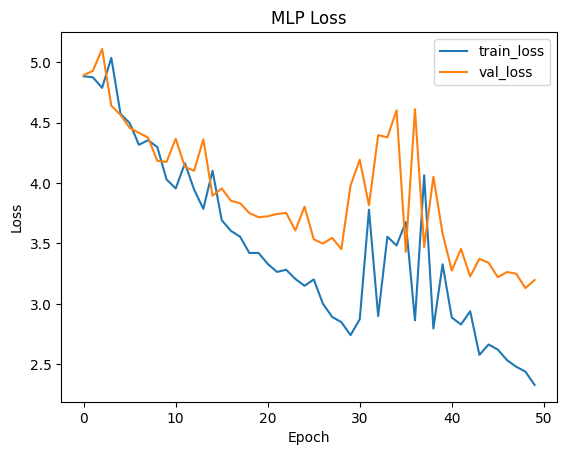

In [33]:
plot_loss(history_1, "MLP Loss")

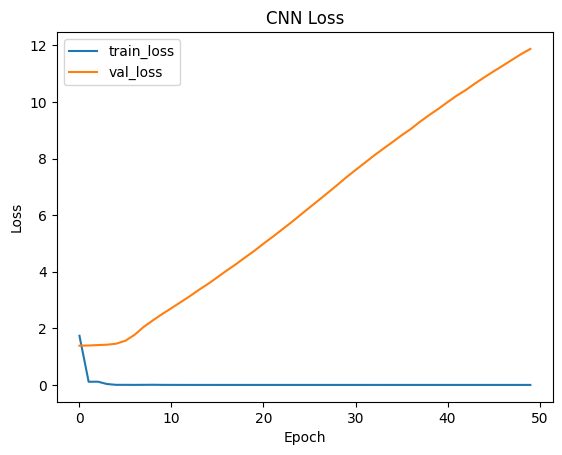

In [34]:
plot_loss(history_2, "CNN Loss")

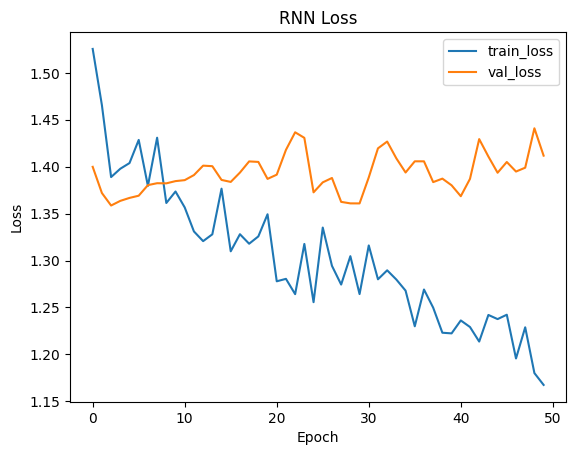

In [35]:
plot_loss(history_3, "RNN Loss")

# 4. Оцените качество многоклассовой классификации нейронными сетями MLP, CNN и RNN на тестовой выборке при помощи показателя качества, указанного в индивидуальном задании, и выведите архитектуру нейронной сети с лучшим качеством.

In [36]:
def pr(threshold_vector, y_test):
    true_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 1)
    true_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 0)
    false_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 0)
    false_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 1)
    recall = true_positive.sum() / (true_positive.sum() + false_negative.sum())
    return recall

In [38]:
loss_mlp, accuracy_mlp = model_1.evaluate(tstimages, tstlabels)
loss_cnn, accuracy_cnn = model_2.evaluate(tstimages, tstlabels2)
loss_rnn, accuracy_rnn = model_3.evaluate(tstimages, tstlabels)

print("MLP: Точность на тестовой выборке =", accuracy_mlp)
print("CNN: Точность на тестовой выборке =", accuracy_cnn)
print("RNN: Точность на тестовой выборке =", accuracy_rnn)

4/4 [==============================] - 0s 25ms/step - loss: 1.4117 - accuracy: 0.2800
MLP: Точность на тестовой выборке = 0.4000000059604645
CNN: Точность на тестовой выборке = 0.20800000429153442
RNN: Точность на тестовой выборке = 0.2800000011920929


In [39]:
best_accuracy = max(accuracy_mlp, accuracy_cnn, accuracy_rnn)

if best_accuracy == accuracy_mlp:
    print(f"Модель с лучшей точностью: MLP ({best_accuracy})")
elif best_accuracy == accuracy_cnn:
    print(f"Модель с лучшей точностью: CNN ({best_accuracy})")
else:
    print(f"Модель с лучшей точностью: RNN ({best_accuracy})")

Модель с лучшей точностью: MLP (0.4000000059604645)


# 5.Визуализируйте кривые обучения трех построенных моделей для показателя потерь на одном рисунке в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду. Используйте для визуализации относительные потери (потери, деленные на начальную потери на первой эпохе).

In [40]:
def epochs(history):
  return range(1, len(history.history['val_loss']) + 1)

In [41]:
ep1 = epochs(history_1)
ep2 = epochs(history_2)
ep3 = epochs(history_3)

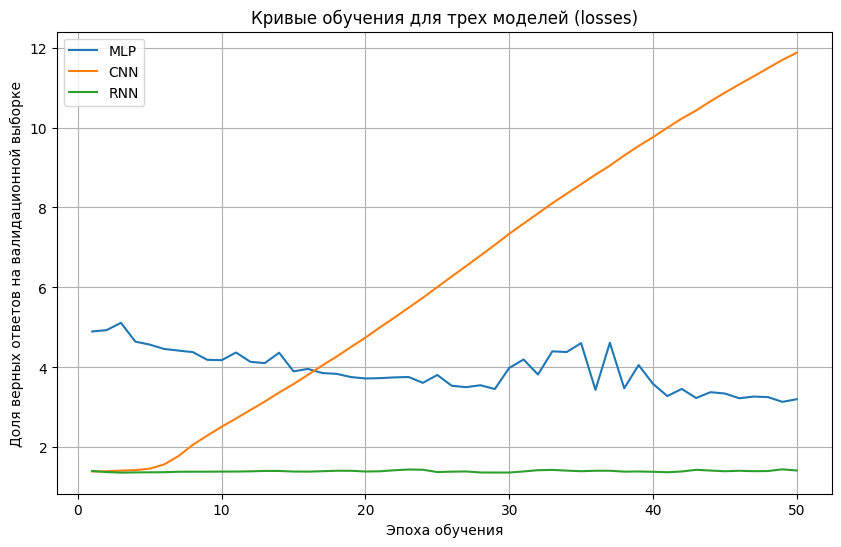

In [42]:
plt.figure(figsize=(10, 6))

plt.plot(ep1, history_1.history['val_loss'], label='MLP')
plt.plot(ep2, history_2.history['val_loss'], label='CNN')
plt.plot(ep3, history_3.history['val_loss'], label='RNN')

plt.title('Кривые обучения для трех моделей (losses)')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов на валидационной выборке')
plt.legend()
plt.grid(True)
plt.show()

##6.Визуализируйте кривые обучения трех построенных моделей для показателя доли верных ответов на валидационной выборке на одном рисунке в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.

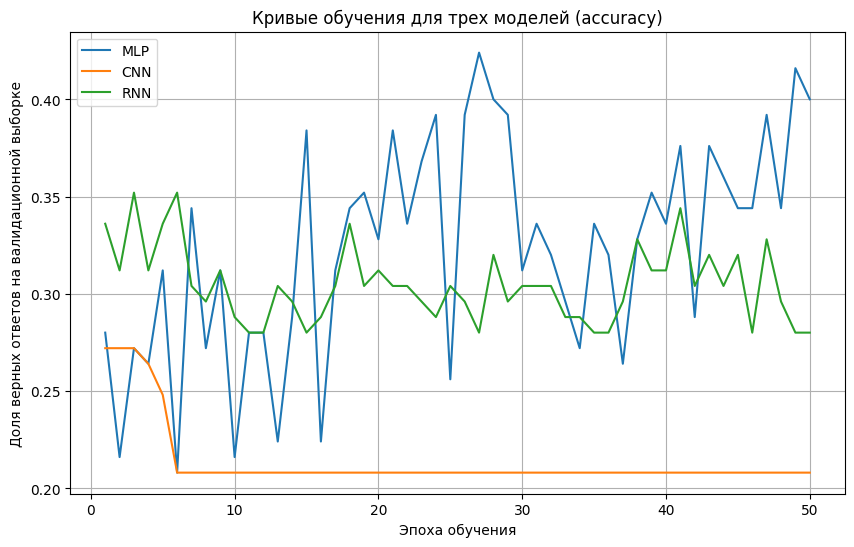

In [43]:
plt.figure(figsize=(10, 6))

plt.plot(ep1, history_1.history['val_accuracy'], label='MLP')
plt.plot(ep2, history_2.history['val_accuracy'], label='CNN')
plt.plot(ep3, history_3.history['val_accuracy'], label='RNN')

plt.title('Кривые обучения для трех моделей (accuracy)')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов на валидационной выборке')
plt.legend()
plt.grid(True)
plt.show()

# 7.Для каждого из классов определите два изображения в тестовой выборке, имеющее минимальную и максимальную вероятности классификации в правильный класс, и визуализируйте эти изображения

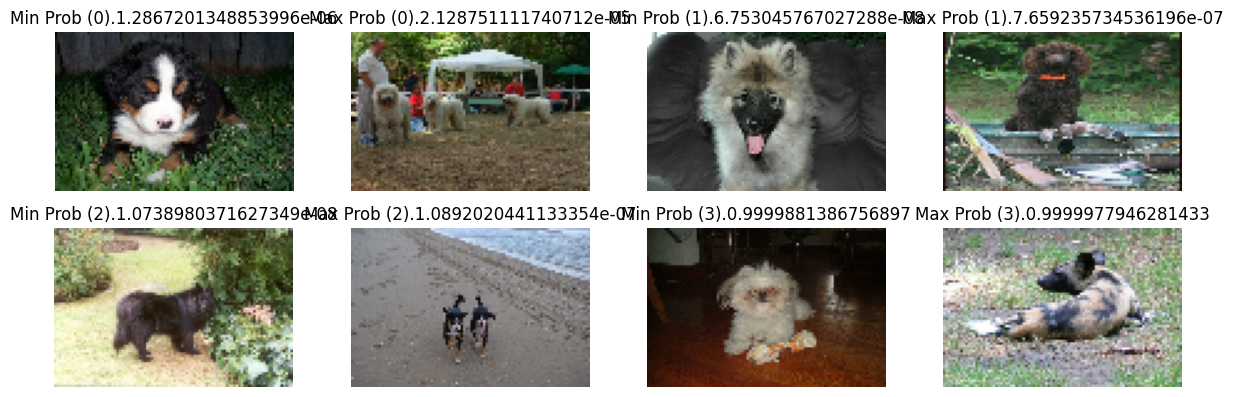

In [44]:
min_indices = {label: None for label in range(4)}
max_indices = {label: None for label in range(4)}

for i, (prediction, true_label) in enumerate(zip(pred2, tstlabels2)):
    true_label = int(true_label)
    if min_indices[true_label] is None or prediction[true_label] < pred2[min_indices[true_label]][true_label]:
        min_indices[true_label] = i
    if max_indices[true_label] is None or prediction[true_label] > pred2[max_indices[true_label]][true_label]:
        max_indices[true_label] = i

plt.figure(figsize=(12, 8))
for label in range(4):
    plt.subplot(4, 4, 2 * label + 1)
    plt.imshow(test_images[min_indices[label]])
    plt.title(f'Min Prob ({label}).{pred2[min_indices[label]][label]}')
    plt.axis('off')

    plt.subplot(4, 4, 2 * label + 2)
    plt.imshow(test_images[max_indices[label]])
    plt.title(f'Max Prob ({label}).{pred2[max_indices[label]][label]}')
    plt.axis('off')
plt.tight_layout()
plt.show()
